# Identification of spam vs ham messeges 

# Overview of the project 
## Exploratory data analysis
* The data is provided into tab sepereted format, which is converted into a more accesseble pandas dataframe
* This data frame consisted of two columns, the text message and the label, whcih is either spam or ham
* A new feature is created which is the length of the messages, analysis was done based on this feature and outliers were removed
* It was observed that the spam messeges generally lie in a specific segment of length.

## Data preprocessing 
* Set of punctuations was obtained from the string library, these punctuation marks were removed from the text.  
* The words that didn't add value to the identification of the messages a.k.a. stop words were removed
* The list of words were again converted as organised data structures

## Converting the texts into logical numbers
* Library of all the relevent words that appeared in the texts werer created
* All the text samples were then vectorized and sparse matrix was created for the bag of words model
* All the terms appearing in the document do not have same weight value, for this, term frequency and inverse document frequency were added. 
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
* IDF(t) = log_e(Total number of documents / Number of documents with term t in it)
* This weighs down the words which are not that important and appears commonly in the document 


# Making the Pipeline
* The text preprossesing functions and transformations were imbeded and a pipeline was made using the classifier, that takes in the string values and outputs the labels
* Random Forest Classifier was used, here is a comparision between the accuracies obtained by various classifiers
* 96 Percent accuracy was obtained with data the random forest classifier 

Lastly, we put some arbitrary text which seems spam and ham to us, and see whether the model can correctly classify it as spam or ham

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Description of the data:
The dataset is taken form UCI machine learning repository. This data set consisits of 5000+ text messages, and our task here is to use natural language processing and make a prediction model that differentiates between spam vs ham data.

In [20]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [21]:
messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

Enumerate method adds a counter to the eterable item and 

In [22]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

# Exploratory data analysis

# Length of the messages can prove to be an interesting feature, let's dig it out and see the trend

In [24]:
import pandas as pd
messages  = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ["label", "message"])
messages['len'] = messages['message'].apply(lambda x: len(x))

In [25]:
messages

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


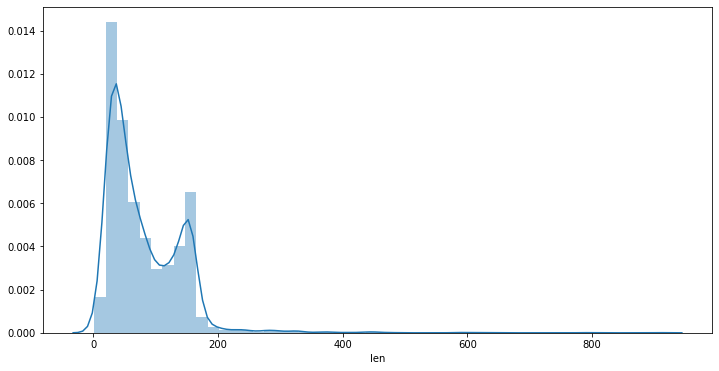

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(messages.len)

# There are outliers around 800, but it seems their aren't enough of them, so we can go ahead and remove them 

In [27]:
messages[messages["len"] > 400 ].count()

label      17
message    17
len        17
dtype: int64

In [28]:
messages.len.mean()

80.48994974874371

In [29]:
a = messages[messages["len"] > 800 ].message

In [30]:
a[1085]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [31]:
df = messages.drop(1085)

In [32]:
import nltk

In [33]:
df.groupby('label').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4824.0   71.308665  57.185704   2.0   33.0   52.0   93.0  790.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

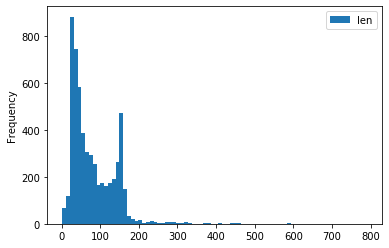

In [34]:
df.plot.hist(bins = 80)

# Spam vs ham lengths

# Trends in the length of the messages

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A97BD0488>,
      dtype=object)

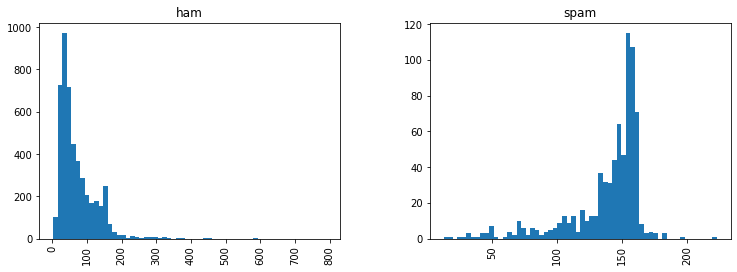

In [35]:
df.hist(column= 'len', by = 'label', bins = 60, figsize = (12,4))

# Spam messages have relatively more numbers of charecters.

# Cleaning the messages

In [36]:
from nltk.corpus import stopwords

# Removing the punctuations

In [37]:
import string


In [38]:
mess = 'Sample Messages to, \[] remove the punctuation: ; '

In [39]:
nopunc = [c for c in mess if c not in string.punctuation]

In [40]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 's',
 ' ',
 't',
 'o',
 ' ',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 ' ']

Joining elements of the list together

Basically the join function works by joining the list elements with the string passed

In [41]:
mess = "".join(nopunc)

In [42]:
mess

'Sample Messages to  remove the punctuation  '

To remove the stop words

In [43]:
clean_mess = [c for c in mess.split() if c.lower() not in stopwords.words('english')]

In [44]:
clean_mess

['Sample', 'Messages', 'remove', 'punctuation']

# Here we define a function that removes the punctuations

In [45]:
def removepunc(x):
    nopunc = [i for i in x if i not in string.punctuation]
    return ''.join(nopunc)

In [46]:

removepunc('what , is , this:')

'what  is  this'

# Here we define a function that looks into data directory of words that doesn't add value as a feature, such as "is" "the" "on"

In [47]:
def removestop(x):
    clean = [i for i in x.split() if i.lower() not in stopwords.words('english')]
    return clean

In [48]:
removestop('This is the test to remove the stop words from this sentance')

['test', 'remove', 'stop', 'words', 'sentance']

# We can see only the meaningful words remain in the list, now applying these two function to the entire dataset

In [49]:
df['clean_messages'] = df.message.apply(removepunc).apply(removestop)

In [50]:
df

,label,message,len,clean_messages
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,"[2nd, time, tried, 2, contact, u, U, £750, Pou..."
5568,ham,Will ü b going to esplanade fr home?,36,"[ü, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[Pity, mood, Soany, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,125,"[guy, bitching, acted, like, id, interested, b..."


# Create a bag of words model

There are three steps for this
- Getting the vectorization of the words
- The first one is getting the term frequency, higher the term frequency, lower is the vaule
- assigning values -> inverse term frequency
- Normalize the vectors with unit length


In [51]:
def text_process(x):
    x = removepunc(x)
    x = removestop(x)
    return x

In [52]:
text_process('whats up dog, hows it been?')

['whats', 'dog', 'hows']

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
transformer = CountVectorizer(analyzer = text_process).fit(df['message'])

In [55]:
len(transformer.vocabulary_)

11407

# The above transformation creates a bag of words, that is, for each message, it creates a feature vector of 11407 features and their occurences

In [62]:
sample = df['message'][9]

In [63]:
sample

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [64]:
x = transformer.transform([sample])

In [65]:
print(x)

  (0, 58)	1
  (0, 315)	1
  (0, 1417)	1
  (0, 1492)	1
  (0, 1865)	1
  (0, 1941)	1
  (0, 2852)	1
  (0, 3321)	1
  (0, 4068)	1
  (0, 4128)	2
  (0, 5303)	1
  (0, 5593)	1
  (0, 6326)	1
  (0, 7709)	1
  (0, 8206)	1
  (0, 8207)	1
  (0, 8241)	1


In [66]:

transformed_messages = transformer.transform(df['message'])

# tfidf is weight value of perticular word

In [74]:
from sklearn.feature_extraction.text import TfidfTransformer

This will transform the bag of words model to a weighted value

In [46]:
toidf = TfidfTransformer()

In [48]:
toidf.fit(transformed_messages)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [49]:
toidf.idf_[transformer.vocabulary_['u']]

3.2798729740711003

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


# Let's make a data pipeline

In [105]:
from sklearn.model_selection import train_test_split
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.metrics import classification_report, accuracy_score

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=43)


spam_detector = Pipeline([('bow', CountVectorizer(analyzer = text_process)),
                          ('tfidf', TfidfTransformer()),
                          ('classifier', classifier)])

spam_detector.fit(X_train,y_train)

prediction = spam_detector.predict(X_test)


print(classification_report(y_test, prediction))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1583
        spam       0.99      0.69      0.82       256

    accuracy                           0.96      1839
   macro avg       0.97      0.85      0.90      1839
weighted avg       0.96      0.96      0.95      1839



In [110]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


In [119]:
model = LogisticRegression()
model = Pipeline([('bow', CountVectorizer(analyzer = text_process)),('tfidf', TfidfTransformer()),('classifier', classifier)])
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(classifier, " : ", accuracy_score(y_test, prediction))
    

TypeError: fit() missing 1 required positional argument: 'y'

In [102]:
spam_detector.predict(['You are required to attend the meeting tomorrow ar 10', "Call FREEPHONE 0800 542 0578 now! Avail your offer, hurry up!"])

array(['ham', 'spam'], dtype=object)